In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
#Importing all the necessory libraries

In [2]:
df=pd.read_csv('UNSW_NB15_training-set.csv')

In [3]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


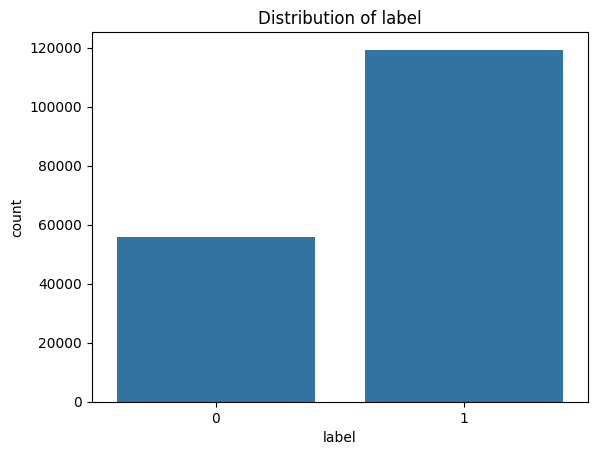

In [4]:
sns.countplot(data=df, x='label')
plt.title('Distribution of label')
plt.show()

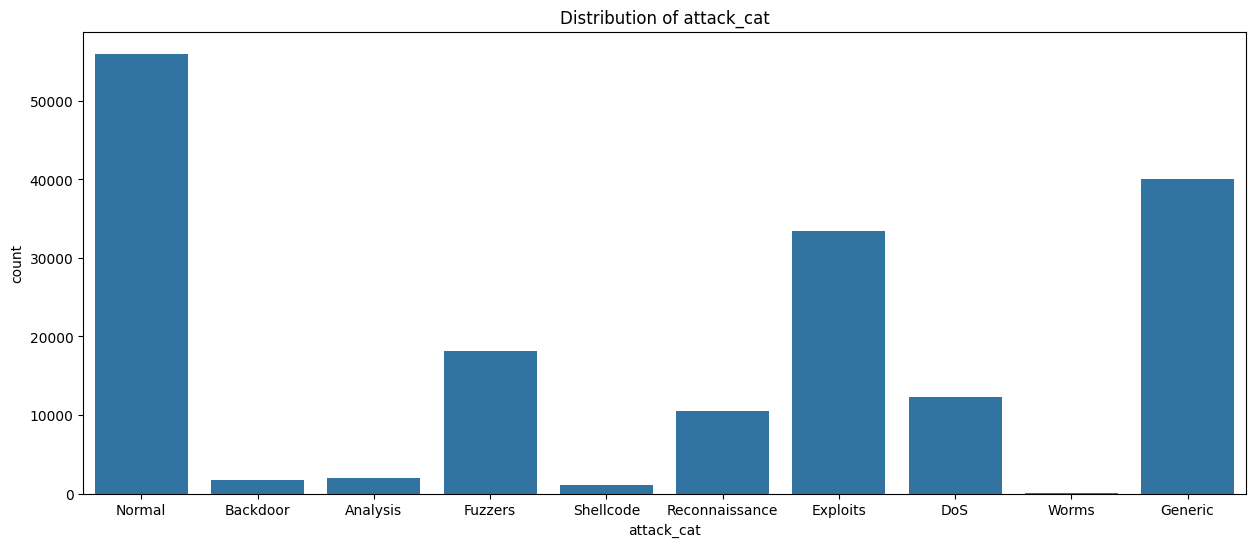

In [5]:
plt.figure(figsize=(15, 6))  # width=12 inches, height=6 inches
sns.countplot(data=df, x='attack_cat')
plt.title('Distribution of attack_cat')
plt.show()

In [6]:
print(df['attack_cat'].value_counts())

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


In [7]:
df=df.drop(['id'], axis=1)
df=df.drop(['label'], axis=1)

In [8]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,Generic
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,Generic
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,Generic


In [9]:
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,Generic
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,Generic
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,Generic


In [10]:
nan_counts = df.isna().sum()
print(nan_counts)

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
dtype: int6

In [11]:
df=df.drop(['service'], axis=1)

In [12]:
X=X = df.drop(columns='attack_cat')

In [ ]:
# List of common fake NaN placeholders
fake_nan_values = ['-', '?', '']

# Create a mask and count occurrences
for val in fake_nan_values:
    fake_nan_mask = (X == val)
    count = fake_nan_mask.sum()
    count = count[count > 0]  # Only show columns where the value is found
    if not count.empty:
        print(f"\nPlaceholder '{val}' found in:")
        print(count)


In [14]:
cols_to_check = ['proto', 'state']

for col in cols_to_check:
    print(f"{col}: {df[col].nunique()} unique values")

proto: 133 unique values
state: 9 unique values


In [15]:
# Frequency encode 'proto'
proto_freq = df['proto'].value_counts(normalize=True)  # relative frequency
df['proto'] = df['proto'].map(proto_freq)

from sklearn.preprocessing import OneHotEncoder

# OneHot encode 'state'
df = pd.get_dummies(df, columns=['state'],dtype=int)

le = LabelEncoder()

# Fit and transform the 'attack_cat' column
df['attack_cat'] = le.fit_transform(df['attack_cat'])

In [16]:
df

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,0.455946,6,4,258,172,74.087490,252,254,1.415894e+04,...,6,0,0,1,0,0,0,0,0,0
1,0.649902,0.455946,14,38,734,42014,78.473372,62,252,8.395112e+03,...,6,0,0,1,0,0,0,0,0,0
2,1.623129,0.455946,8,16,364,13186,14.170161,62,252,1.572272e+03,...,6,0,0,1,0,0,0,0,0,0
3,1.681642,0.455946,12,12,628,770,13.677108,62,252,2.740179e+03,...,6,0,0,1,0,0,0,0,0,0
4,0.449454,0.455946,10,6,534,268,33.373826,254,252,8.561499e+03,...,6,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175337,0.505762,0.455946,10,8,620,354,33.612649,254,252,8.826286e+03,...,8,0,0,1,0,0,0,0,0,0
175338,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175339,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0


In [17]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [18]:
X

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_sm_ips_ports,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,0.455946,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,0.455946,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,0.455946,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,0.455946,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,0.455946,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,1,0,0,0,0,0
175337,0.505762,0.455946,10,8,620,354,33.612649,254,252,8.826286e+03,...,0,0,0,1,0,0,0,0,0,0
175338,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,1,0,0,0,0,0
175339,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,0,0,0,0,1,0,0,0,0,0


In [19]:
y

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int64

In [20]:
corr_matrix = X.corr()

# Get the upper triangle of the correlation matrix (to avoid redundancy)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Remove those columns from X
df = df.drop(columns=to_drop)

# Display the reduced X shape and columns
print(f"Columns removed: {to_drop}")


Columns removed: ['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'tcprtt', 'synack', 'ackdat', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'state_FIN']


In [21]:
df

,dur,proto,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,...,ct_flw_http_mthd,attack_cat,state_CON,state_ECO,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,0.455946,6,4,74.087490,252,254,1.415894e+04,8495.365234,24.295600,...,0,6,0,0,0,0,0,0,0,0
1,0.649902,0.455946,14,38,78.473372,62,252,8.395112e+03,503571.312500,49.915000,...,0,6,0,0,0,0,0,0,0,0
2,1.623129,0.455946,8,16,14.170161,62,252,1.572272e+03,60929.230470,231.875571,...,0,6,0,0,0,0,0,0,0,0
3,1.681642,0.455946,12,12,13.677108,62,252,2.740179e+03,3358.622070,152.876547,...,0,6,0,0,0,0,0,0,0,0
4,0.449454,0.455946,10,6,33.373826,254,252,8.561499e+03,3987.059814,47.750333,...,0,6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,5,0,0,1,0,0,0,0,0
175337,0.505762,0.455946,10,8,33.612649,254,252,8.826286e+03,4903.492188,54.400111,...,0,8,0,0,0,0,0,0,0,0
175338,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,5,0,0,1,0,0,0,0,0
175339,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,5,0,0,1,0,0,0,0,0


In [22]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [23]:
y


0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int64

In [24]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

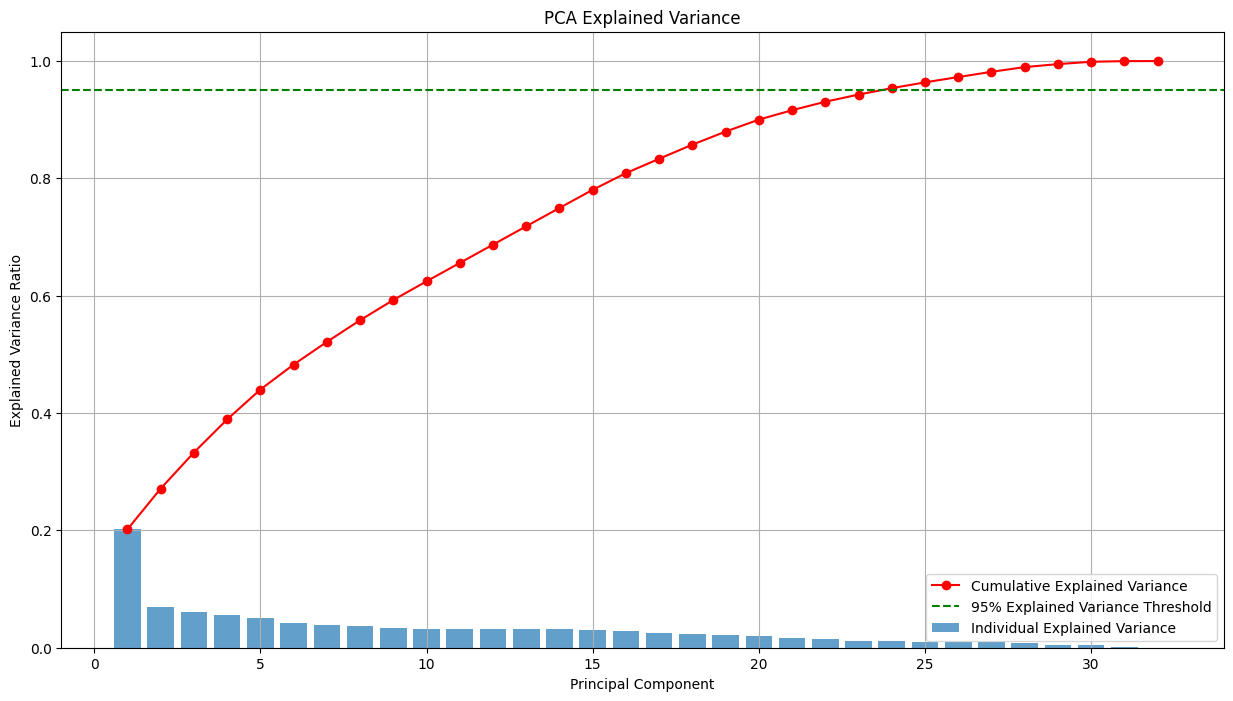

In [26]:
# Perform PCA and plot explained variance ratio
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(15, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Explained Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

In [34]:
feature_names = df.drop('attack_cat', axis=1).columns.tolist()
print(feature_names)

['dur', 'proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'is_ftp_login', 'ct_flw_http_mthd', 'state_CON', 'state_ECO', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no']


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import numpy as np
import random

# Genetic Algorithm parameters
population_size = 20
generations = 10
mutation_rate = 0.1
n_features = X.shape[1]

def fitness(individual, X, y):
    # Use only selected features
    selected = np.where(individual == 1)[0]
    if len(selected) == 0:
        return 0
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X[:, selected], y, cv=3, scoring='accuracy')
    return scores.mean()

# Initialize population
population = np.random.randint(2, size=(population_size, n_features))

for gen in range(generations):
    fitness_scores = np.array([fitness(ind, X, y) for ind in population])
    # Selection (tournament)
    selected_indices = np.argsort(fitness_scores)[-population_size//2:]
    selected_population = population[selected_indices]
    # Crossover
    offspring = []
    while len(offspring) < population_size:
        parents = selected_population[np.random.choice(selected_population.shape[0], 2, replace=False)]
        crossover_point = np.random.randint(1, n_features-1)
        child = np.concatenate([parents[0][:crossover_point], parents[1][crossover_point:]])
        # Mutation
        for i in range(n_features):
            if random.random() < mutation_rate:
                child[i] = 1 - child[i]
        offspring.append(child)
    population = np.array(offspring)

# Get the best individual
fitness_scores = np.array([fitness(ind, X, y) for ind in population])
best_individual = population[np.argmax(fitness_scores)]
selected_features = np.where(best_individual == 1)[0]
print("Selected feature indices:", selected_features)
print("Selected feature names:", [feature_names[i] for i in selected_features])

Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 24 25 26 27
 29 30]
Selected feature names: ['dur', 'proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'state_CON', 'state_ECO', 'state_INT', 'state_PAR', 'state_RST', 'state_URN']


In [44]:
# Update the dataframe to keep only the selected features and the target column
selected_feature_names = [feature_names[i] for i in selected_features]
df_selected = df[selected_feature_names + ['attack_cat']]
df_selected.head()

,dur,proto,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,...,trans_depth,response_body_len,ct_srv_src,state_CON,state_ECO,state_INT,state_PAR,state_RST,state_URN,attack_cat
0,0.121478,0.455946,6,4,74.087490,252,254,14158.942380,8495.365234,24.295600,...,0,0,1,0,0,0,0,0,0,6
1,0.649902,0.455946,14,38,78.473372,62,252,8395.112305,503571.312500,49.915000,...,0,0,43,0,0,0,0,0,0,6
2,1.623129,0.455946,8,16,14.170161,62,252,1572.271851,60929.230470,231.875571,...,0,0,7,0,0,0,0,0,0,6
3,1.681642,0.455946,12,12,13.677108,62,252,2740.178955,3358.622070,152.876547,...,0,0,1,0,0,0,0,0,0,6
4,0.449454,0.455946,10,6,33.373826,254,252,8561.499023,3987.059814,47.750333,...,0,0,43,0,0,0,0,0,0,6


In [45]:
df=df_selected
df

,dur,proto,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,...,trans_depth,response_body_len,ct_srv_src,state_CON,state_ECO,state_INT,state_PAR,state_RST,state_URN,attack_cat
0,0.121478,0.455946,6,4,74.087490,252,254,1.415894e+04,8495.365234,24.295600,...,0,0,1,0,0,0,0,0,0,6
1,0.649902,0.455946,14,38,78.473372,62,252,8.395112e+03,503571.312500,49.915000,...,0,0,43,0,0,0,0,0,0,6
2,1.623129,0.455946,8,16,14.170161,62,252,1.572272e+03,60929.230470,231.875571,...,0,0,7,0,0,0,0,0,0,6
3,1.681642,0.455946,12,12,13.677108,62,252,2.740179e+03,3358.622070,152.876547,...,0,0,1,0,0,0,0,0,0,6
4,0.449454,0.455946,10,6,33.373826,254,252,8.561499e+03,3987.059814,47.750333,...,0,0,43,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,0,24,0,0,1,0,0,0,5
175337,0.505762,0.455946,10,8,33.612649,254,252,8.826286e+03,4903.492188,54.400111,...,0,0,1,0,0,0,0,0,0,8
175338,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,0,12,0,0,1,0,0,0,5
175339,0.000009,0.360914,2,0,111111.107200,254,0,5.066666e+07,0.000000,0.009000,...,0,0,30,0,0,1,0,0,0,5


In [46]:
feature_names = df.drop('attack_cat', axis=1).columns.tolist()
print(feature_names)

['dur', 'proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'state_CON', 'state_ECO', 'state_INT', 'state_PAR', 'state_RST', 'state_URN']


In [ ]:
X = df.drop(columns='attack_cat')
y = df['attack_cat']

In [48]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Full model
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_pred_before = model.predict(X_test)
log_accuracy_before = accuracy_score(y_test, logistic_pred_before)
print(f"Full model accuracy: {log_accuracy_before:.4f}")

Full model accuracy: 0.7528


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print("Classification Report:\n", classification_report(y_test, logistic_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02       393
           1       0.00      0.00      0.00       360
           2       0.35      0.08      0.13      2370
           3       0.59      0.85      0.70      6772
           4       0.47      0.66      0.55      3570
           5       0.94      0.97      0.95      8079
           6       0.97      0.80      0.88     11169
           7       0.57      0.61      0.59      2098
           8       0.00      0.00      0.00       233
           9       0.00      0.00      0.00        25

    accuracy                           0.75     35069
   macro avg       0.44      0.40      0.38     35069
weighted avg       0.75      0.75      0.74     35069



c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
for idx, class_name in enumerate(le.classes_):
    print(f"{idx}: {class_name}")

0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


In [53]:
# Full model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
tree_pred_before = model.predict(X_test)
tree_accuracy_before = accuracy_score(y_test, tree_pred_before)
print(f"Full model accuracy: {tree_accuracy_before:.4f}")

Full model accuracy: 0.8058


In [54]:
print("Classification Report:\n", classification_report(y_test, tree_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.16      0.25       393
           1       0.55      0.12      0.19       360
           2       0.32      0.17      0.22      2370
           3       0.62      0.84      0.71      6772
           4       0.70      0.67      0.69      3570
           5       0.99      0.98      0.99      8079
           6       0.92      0.91      0.91     11169
           7       0.87      0.73      0.79      2098
           8       0.43      0.40      0.42       233
           9       0.48      0.40      0.43        25

    accuracy                           0.81     35069
   macro avg       0.64      0.54      0.56     35069
weighted avg       0.80      0.81      0.80     35069



In [55]:
# Full model
model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_pred_before = model.predict(X_test)
forest_accuracy_before = accuracy_score(y_test, forest_pred_before)
print(f"Full model accuracy: {forest_accuracy_before:.4f}")

Full model accuracy: 0.8217


In [56]:
print("Classification Report:\n", classification_report(y_test, forest_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.14      0.23       393
           1       0.76      0.11      0.19       360
           2       0.35      0.14      0.20      2370
           3       0.63      0.89      0.74      6772
           4       0.71      0.73      0.72      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.91      0.92     11169
           7       0.90      0.74      0.81      2098
           8       0.54      0.39      0.45       233
           9       0.75      0.24      0.36        25

    accuracy                           0.82     35069
   macro avg       0.72      0.53      0.56     35069
weighted avg       0.82      0.82      0.81     35069



In [57]:
# Full model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
knn_pred_before = model.predict(X_test)
knn_accuracy_before = accuracy_score(y_test, knn_pred_before)
print(f"Full model accuracy: {knn_accuracy_before:.4f}")

Full model accuracy: 0.7866


In [58]:
print("Classification Report:\n", classification_report(y_test, knn_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.13      0.17       393
           1       0.24      0.07      0.10       360
           2       0.32      0.42      0.36      2370
           3       0.67      0.71      0.69      6772
           4       0.63      0.66      0.65      3570
           5       0.99      0.98      0.99      8079
           6       0.92      0.89      0.90     11169
           7       0.77      0.68      0.73      2098
           8       0.53      0.31      0.39       233
           9       0.67      0.16      0.26        25

    accuracy                           0.79     35069
   macro avg       0.60      0.50      0.52     35069
weighted avg       0.79      0.79      0.79     35069



In [63]:
parameters = {
    'max_iter': [1000],  # Ensure convergence
}

clf = LogisticRegression()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_iter': 1000}


In [ ]:
best_model = grid.best_estimator_
log_pred_after = best_model.predict(X_test)

In [65]:
log_accuracy_after = accuracy_score(y_test, log_pred_after)
print(f"Logistic Accuracy After Tuning: {log_accuracy_after:.4f}")

Logistic Accuracy After Tuning: 0.7540


In [66]:
print("Classification Report:\n", classification_report(y_test, log_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       393
           1       0.00      0.00      0.00       360
           2       0.35      0.09      0.14      2370
           3       0.59      0.85      0.70      6772
           4       0.48      0.66      0.56      3570
           5       0.94      0.97      0.95      8079
           6       0.97      0.80      0.88     11169
           7       0.57      0.62      0.59      2098
           8       0.00      0.00      0.00       233
           9       0.00      0.00      0.00        25

    accuracy                           0.75     35069
   macro avg       0.44      0.40      0.38     35069
weighted avg       0.75      0.75      0.74     35069



c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [79]:
parameters = {
    'criterion': ['gini'],         # use only 'gini' to reduce search space
    'max_depth': [20],         # smaller set of depths
    'min_samples_split': [5],   # reasonable defaults
    'min_samples_leaf': [5]     # fewer options
}

# Initialize model and GridSearchCV without StratifiedKFold (uses default 5-fold)
clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [80]:
best_model = grid.best_estimator_
tree_pred_after = best_model.predict(X_test)

In [81]:
tree_accuracy_after = accuracy_score(y_test, tree_pred_after)
print(f"Decision Tree Accuracy After Tuning: {tree_accuracy_after:.4f}")

Decision Tree Accuracy After Tuning: 0.8103


In [82]:
print("Classification Report:\n", classification_report(y_test, tree_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.16      0.24       393
           1       0.58      0.11      0.18       360
           2       0.32      0.16      0.22      2370
           3       0.62      0.86      0.72      6772
           4       0.68      0.72      0.70      3570
           5       1.00      0.98      0.99      8079
           6       0.93      0.90      0.91     11169
           7       0.90      0.73      0.81      2098
           8       0.52      0.36      0.43       233
           9       0.67      0.48      0.56        25

    accuracy                           0.81     35069
   macro avg       0.67      0.55      0.58     35069
weighted avg       0.81      0.81      0.80     35069



In [83]:
parameters = {
    'n_estimators': [100],           # default reasonable size
    'max_depth': [None],             # no depth limit
    'min_samples_split': [2],        # default
    'min_samples_leaf': [1],         # default
    'max_features': ['sqrt'],        # default for classification
    'bootstrap': [True]              # faster and standard
}

# Use default cross-validation (5-fold)
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [84]:
best_model = grid.best_estimator_
forest_pred_after = best_model.predict(X_test)

In [85]:
forest_accuracy_after = accuracy_score(y_test, forest_pred_after)
print(f"Random Forest Accuracy After Tuning: {forest_accuracy_after:.4f}")

Random Forest Accuracy After Tuning: 0.8222


In [86]:
print("Classification Report:\n", classification_report(y_test, forest_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.13      0.22       393
           1       0.80      0.11      0.20       360
           2       0.36      0.14      0.20      2370
           3       0.63      0.89      0.74      6772
           4       0.71      0.73      0.72      3570
           5       1.00      0.98      0.99      8079
           6       0.93      0.91      0.92     11169
           7       0.90      0.74      0.81      2098
           8       0.56      0.39      0.46       233
           9       0.86      0.24      0.38        25

    accuracy                           0.82     35069
   macro avg       0.74      0.53      0.56     35069
weighted avg       0.82      0.82      0.81     35069



In [89]:
parameters = {
    'n_neighbors': [5],             # Standard choice, good for most cases
    'weights': ['distance'],        # Better when data is scaled
    'p': [2],                       # Euclidean distance
    'algorithm': ['auto'],          # Let scikit-learn choose the best
    'leaf_size': [30]               # Default value
}

# Use default cross-validation (5-fold)
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [90]:
best_model = grid.best_estimator_
knn_pred_after = best_model.predict(X_test)

In [91]:
knn_accuracy_after = accuracy_score(y_test, knn_pred_after)
print(f"KNN Accuracy After Tuning: {knn_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.7914


In [92]:
print("Classification Report:\n", classification_report(y_test, knn_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.15      0.20       393
           1       0.26      0.07      0.11       360
           2       0.33      0.42      0.37      2370
           3       0.68      0.71      0.69      6772
           4       0.66      0.66      0.66      3570
           5       1.00      0.98      0.99      8079
           6       0.92      0.90      0.91     11169
           7       0.76      0.71      0.73      2098
           8       0.52      0.39      0.45       233
           9       0.57      0.32      0.41        25

    accuracy                           0.79     35069
   macro avg       0.60      0.53      0.55     35069
weighted avg       0.80      0.79      0.79     35069



In [93]:
# Full model
model = XGBClassifier()
model.fit(X_train, y_train)
xg_pred_before = model.predict(X_test)
xg_accuracy_before = accuracy_score(y_test, xg_pred_before)
print(f"Full model accuracy: {xg_accuracy_before:.4f}")

Full model accuracy: 0.8267


In [94]:
print("Classification Report:\n", classification_report(y_test, xg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.14      0.24       393
           1       0.93      0.11      0.19       360
           2       0.44      0.09      0.15      2370
           3       0.63      0.92      0.74      6772
           4       0.71      0.75      0.73      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.91      0.93     11169
           7       0.90      0.74      0.81      2098
           8       0.55      0.47      0.51       233
           9       0.73      0.32      0.44        25

    accuracy                           0.83     35069
   macro avg       0.76      0.54      0.57     35069
weighted avg       0.83      0.83      0.81     35069



In [95]:
# Full model
model = LGBMClassifier()
model.fit(X_train, y_train)
lg_pred_before = model.predict(X_test)
lg_accuracy_before = accuracy_score(y_test, lg_pred_before)
print(f"Full model accuracy: {lg_accuracy_before:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3582
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 23
[LightGBM] [Info] Start training from score -4.469214
[LightGBM] [Info] Start training from score -4.617161
[LightGBM] [Info] Start training from score -2.651655
[LightGBM] [Info] Start training from score -1.661883
[LightGBM] [Info] Start training from score -2.261603
[LightGBM] [Info] Start training from score -1.480319
[LightGBM] [Info] Start training from score -1.140684
[LightGBM] [Info] Start training from score -2.816185
[LightGBM] [Info] Start training from score -5.048944
[LightGBM] [Info] Start training from score -7.197378


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Full model accuracy: 0.7921


In [96]:
print("Classification Report:\n", classification_report(y_test, lg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.17      0.21       393
           1       0.32      0.09      0.14       360
           2       0.31      0.21      0.25      2370
           3       0.65      0.78      0.71      6772
           4       0.66      0.66      0.66      3570
           5       0.99      0.97      0.98      8079
           6       0.90      0.90      0.90     11169
           7       0.73      0.75      0.74      2098
           8       0.49      0.49      0.49       233
           9       0.10      0.28      0.15        25

    accuracy                           0.79     35069
   macro avg       0.55      0.53      0.52     35069
weighted avg       0.78      0.79      0.78     35069



In [107]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1]
}

# Use default cross-validation (5-fold)
clf = XGBClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:21:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [108]:
best_model = grid.best_estimator_
xg_pred_after = best_model.predict(X_test)

In [109]:
xg_accuracy_after = accuracy_score(y_test, xg_pred_after)
print(f"XgBoost Accuracy After Tuning: {xg_accuracy_after:.4f}")

XgBoost Accuracy After Tuning: 0.8266


In [110]:
print("Classification Report:\n", classification_report(y_test, xg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.15      0.24       393
           1       0.78      0.11      0.19       360
           2       0.40      0.11      0.17      2370
           3       0.63      0.91      0.74      6772
           4       0.72      0.75      0.73      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.91      0.93     11169
           7       0.89      0.74      0.81      2098
           8       0.58      0.47      0.52       233
           9       0.80      0.32      0.46        25

    accuracy                           0.83     35069
   macro avg       0.74      0.55      0.58     35069
weighted avg       0.82      0.83      0.81     35069



In [111]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],           # same as bagging_fraction in LGBM
    'colsample_bytree': [0.8],   # same as feature_fraction in LGBM
    'min_child_samples': [20],   # controls overfitting
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
}
clf = LGBMClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3582
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 23
[LightGBM] [Info] Start training from score -4.469214
[LightGBM] [Info] Start training from score -4.617161
[LightGBM] [Info] Start training from score -2.651655
[LightGBM] [Info] Start training from score -1.661883
[LightGBM] [Info] Start training from score -2.261603
[LightGBM] [Info] Start training from score -1.480319
[LightGBM] [Info] Start training from score -1.140684
[LightGBM] [Info] Start training from score -2.816185
[LightGBM] [Info] Start training from score -5.048944
[LightGBM] [Info] Start training from score -7.197378
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n

In [112]:
best_model = grid.best_estimator_
lg_pred_after = best_model.predict(X_test)

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [114]:
lg_accuracy_after = accuracy_score(y_test, lg_pred_after)
print(f"LgBMClassifier Accuracy After Tuning: {lg_accuracy_after:.4f}")

LgBMClassifier Accuracy After Tuning: 0.8296


In [115]:
print("Classification Report:\n", classification_report(y_test, lg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.15      0.25       393
           1       0.77      0.11      0.20       360
           2       0.44      0.10      0.16      2370
           3       0.63      0.92      0.75      6772
           4       0.73      0.75      0.74      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.92      0.93     11169
           7       0.89      0.74      0.81      2098
           8       0.62      0.50      0.55       233
           9       0.59      0.40      0.48        25

    accuracy                           0.83     35069
   macro avg       0.73      0.56      0.58     35069
weighted avg       0.83      0.83      0.81     35069



In [117]:
# Full model
model = BaggingClassifier()
model.fit(X_train, y_train)
bg_pred_before = model.predict(X_test)
bg_accuracy_before = accuracy_score(y_test, bg_pred_before)
print(f"Full model accuracy: {bg_accuracy_before:.4f}")

Full model accuracy: 0.8187


In [118]:
print("Classification Report:\n", classification_report(y_test, bg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.15      0.24       393
           1       0.63      0.12      0.20       360
           2       0.36      0.16      0.22      2370
           3       0.63      0.88      0.73      6772
           4       0.70      0.73      0.72      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.91      0.92     11169
           7       0.89      0.73      0.80      2098
           8       0.59      0.47      0.52       233
           9       0.64      0.36      0.46        25

    accuracy                           0.82     35069
   macro avg       0.70      0.55      0.58     35069
weighted avg       0.82      0.82      0.81     35069



In [119]:
parameters = {
    'n_estimators': [100],        # number of base estimators
    'max_samples': [0.8],         # fraction of dataset for each base learner
    'max_features': [0.8],        # fraction of features per learner
    'bootstrap': [True],          # with replacement
    'bootstrap_features': [False], # no resampling of features
    'random_state': [42]          # reproducibility
}
clf = BaggingClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100, 'random_state': 42}


In [120]:
best_model = grid.best_estimator_
bg_pred_after = best_model.predict(X_test)

In [121]:
bg_accuracy_after = accuracy_score(y_test, bg_pred_after)
print(f"LgBMClassifier Accuracy After Tuning: {bg_accuracy_after:.4f}")

LgBMClassifier Accuracy After Tuning: 0.8271


In [122]:
print("Classification Report:\n", classification_report(y_test, bg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.14      0.23       393
           1       0.78      0.11      0.19       360
           2       0.39      0.11      0.17      2370
           3       0.63      0.91      0.74      6772
           4       0.72      0.75      0.74      3570
           5       1.00      0.98      0.99      8079
           6       0.94      0.91      0.93     11169
           7       0.90      0.74      0.81      2098
           8       0.63      0.48      0.54       233
           9       0.64      0.28      0.39        25

    accuracy                           0.83     35069
   macro avg       0.73      0.54      0.57     35069
weighted avg       0.82      0.83      0.81     35069



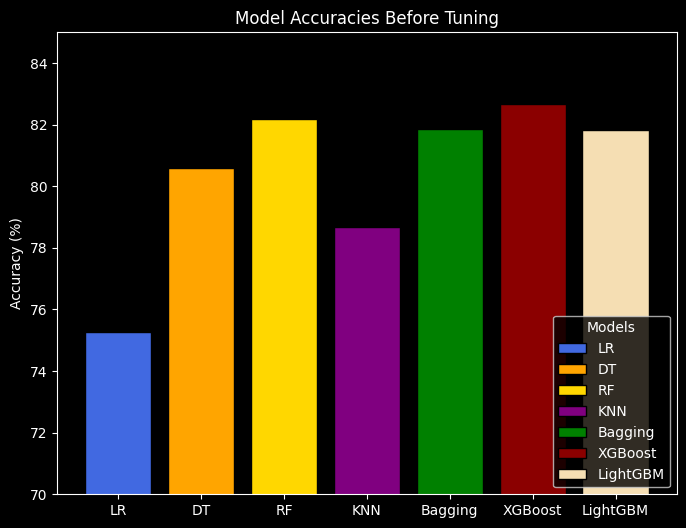

In [131]:
from matplotlib.patches import Patch

# Accuracies before tuning
accuracies = [
    log_accuracy_before,   # Logistic Regression
    tree_accuracy_before,  # Decision Tree
    forest_accuracy_before, # Random Forest
    knn_accuracy_before,   # KNN
    bg_accuracy_before,                  # AdaBoost (not computed)
    xg_accuracy_before,    # XGBoost
    lg_accuracy_before,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM',]
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(70, 85)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Before Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

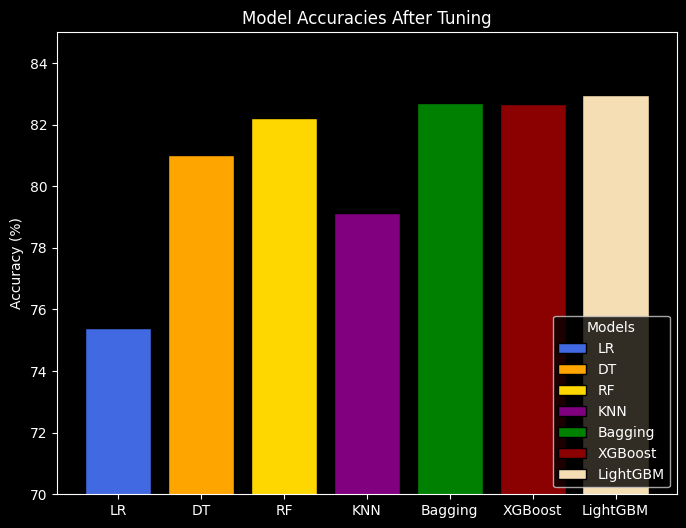

In [133]:
# Accuracies before tuning
accuracies = [
    log_accuracy_after,   # Logistic Regression
    tree_accuracy_after,  # Decision Tree
    forest_accuracy_after, # Random Forest
    knn_accuracy_after,   # KNN
    bg_accuracy_after,                  # AdaBoost (not computed)
    xg_accuracy_after,    # XGBoost
    lg_accuracy_after,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(70, 85)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies After Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

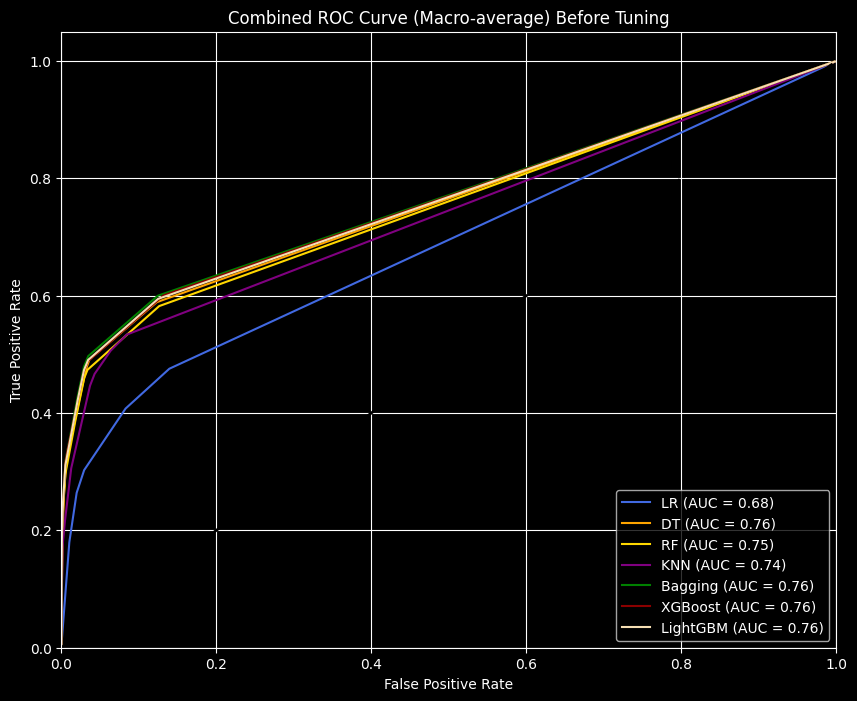

In [134]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    logistic_pred_before,  # Logistic Regression
    tree_pred_before,      # Decision Tree
    forest_pred_before,    # Random Forest
    knn_pred_before,       # KNN
    bg_pred_before,        # Bagging
    xg_pred_before,        # XGBoost
    lg_pred_before         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) Before Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

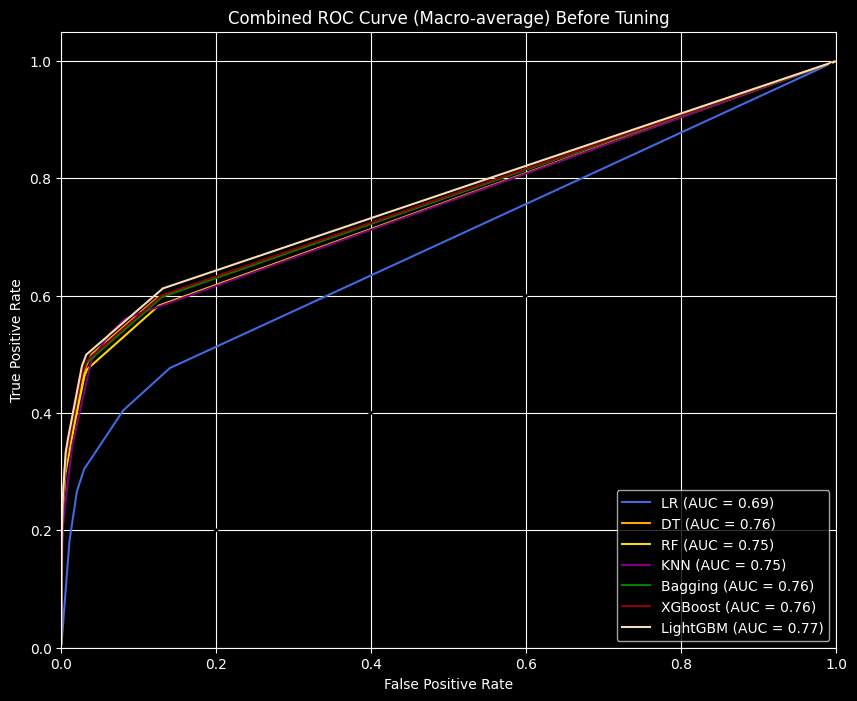

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    log_pred_after,  # Logistic Regression
    tree_pred_after,      # Decision Tree
    forest_pred_after,    # Random Forest
    knn_pred_after,       # KNN
    bg_pred_after,        # Bagging
    xg_pred_after,        # XGBoost
    lg_pred_after         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) After Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


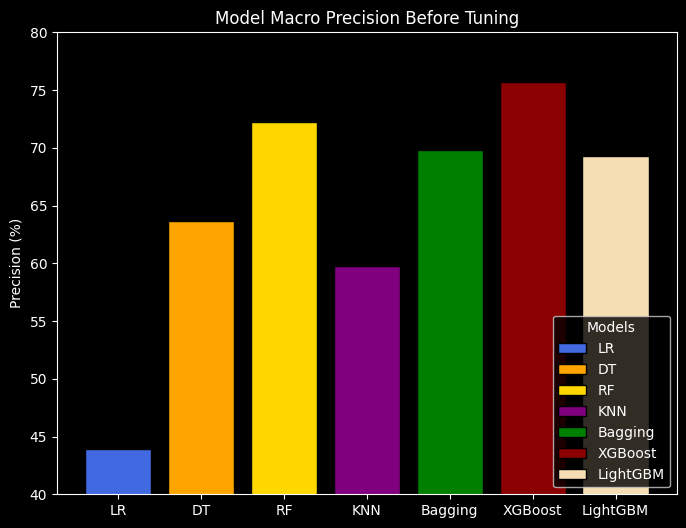

In [139]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model before tuning
precisions = [
    precision_score(y_test, logistic_pred_before, average='macro'),
    precision_score(y_test, tree_pred_before, average='macro'),
    precision_score(y_test, forest_pred_before, average='macro'),
    precision_score(y_test, knn_pred_before, average='macro'),
    precision_score(y_test, bg_pred_before, average='macro'),
    precision_score(y_test, xg_pred_before, average='macro'),
    precision_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions) if p is not None]
plot_precs = [p*100 for p in precisions if p is not None]
plot_colors = [c for c, p in zip(colors, precisions) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(40, 80)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


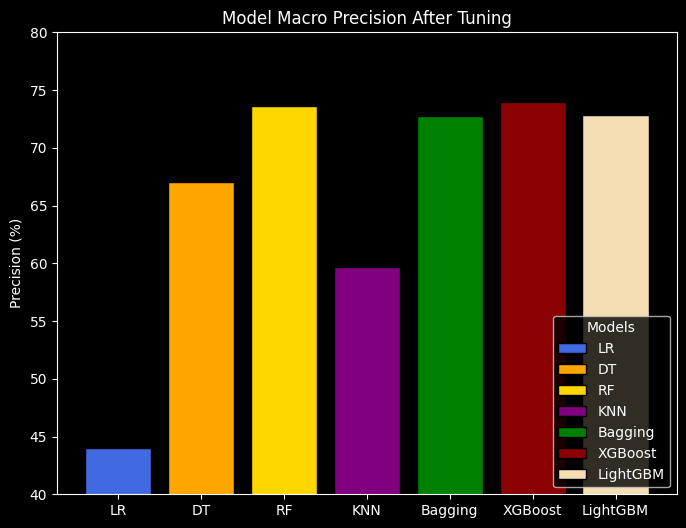

In [140]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model after tuning
precisions_after = [
    precision_score(y_test, log_pred_after, average='macro'),
    precision_score(y_test, tree_pred_after, average='macro'),
    precision_score(y_test, forest_pred_after, average='macro'),
    precision_score(y_test, knn_pred_after, average='macro'),
    precision_score(y_test, bg_pred_after, average='macro'),
    precision_score(y_test, xg_pred_after, average='macro'),
    precision_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions_after) if p is not None]
plot_precs = [p*100 for p in precisions_after if p is not None]
plot_colors = [c for c, p in zip(colors, precisions_after) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(40, 80)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

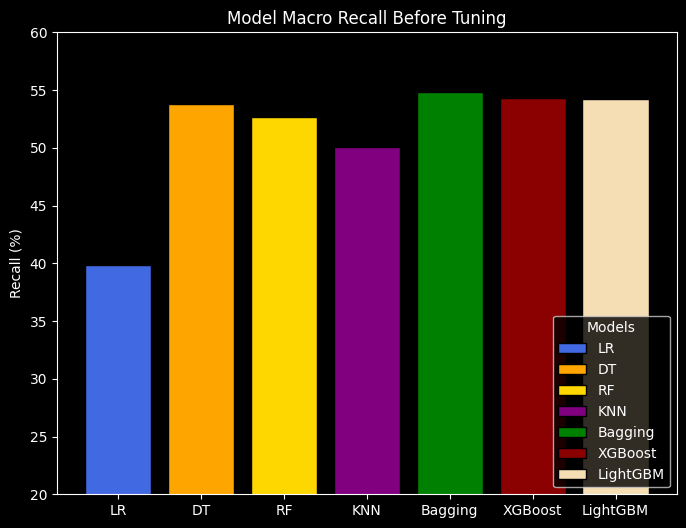

In [142]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model before tuning
recalls = [
    recall_score(y_test, logistic_pred_before, average='macro'),
    recall_score(y_test, tree_pred_before, average='macro'),
    recall_score(y_test, forest_pred_before, average='macro'),
    recall_score(y_test, knn_pred_before, average='macro'),
    recall_score(y_test, bg_pred_before, average='macro'),
    recall_score(y_test, xg_pred_before, average='macro'),
    recall_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls) if r is not None]
plot_recalls = [r*100 for r in recalls if r is not None]
plot_colors = [c for c, r in zip(colors, recalls) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(20, 60)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

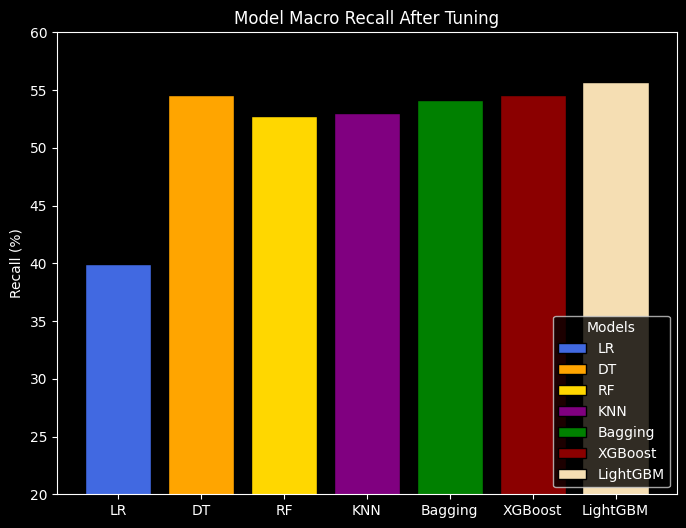

In [143]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model after tuning
recalls_after = [
    recall_score(y_test, log_pred_after, average='macro'),
    recall_score(y_test, tree_pred_after, average='macro'),
    recall_score(y_test, forest_pred_after, average='macro'),
    recall_score(y_test, knn_pred_after, average='macro'),
    recall_score(y_test, bg_pred_after, average='macro'),
    recall_score(y_test, xg_pred_after, average='macro'),
    recall_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls_after) if r is not None]
plot_recalls = [r*100 for r in recalls_after if r is not None]
plot_colors = [c for c, r in zip(colors, recalls_after) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(20, 60)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

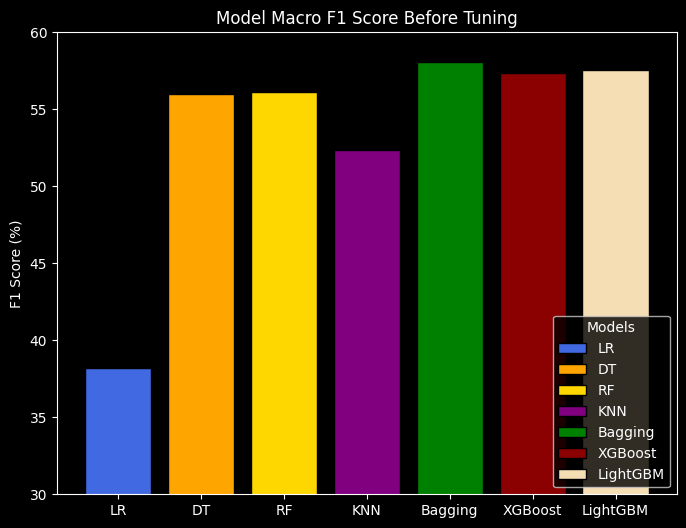

In [151]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, logistic_pred_before, average='macro'),
    f1_score(y_test, tree_pred_before, average='macro'),
    f1_score(y_test, forest_pred_before, average='macro'),
    f1_score(y_test, knn_pred_before, average='macro'),
    f1_score(y_test, bg_pred_before, average='macro'),
    f1_score(y_test, xg_pred_before, average='macro'),
    f1_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(30, 60)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

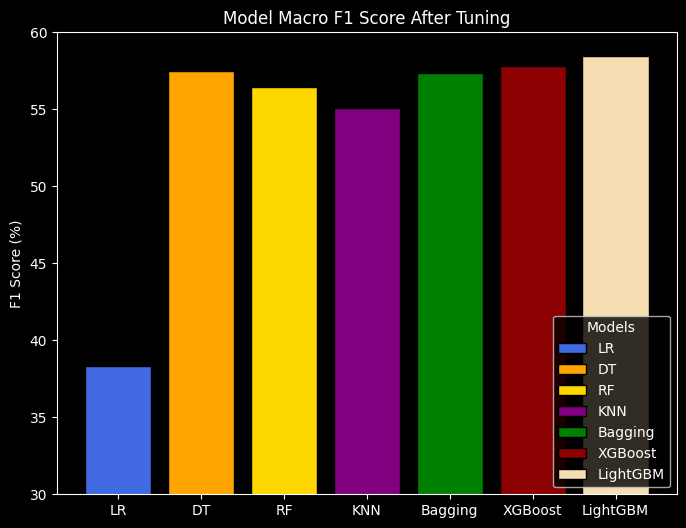

In [150]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, log_pred_after, average='macro'),
    f1_score(y_test, tree_pred_after, average='macro'),
    f1_score(y_test, forest_pred_after, average='macro'),
    f1_score(y_test, knn_pred_after, average='macro'),
    f1_score(y_test, bg_pred_after, average='macro'),
    f1_score(y_test, xg_pred_after, average='macro'),
    f1_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(30, 60)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

In [167]:
df=pd.read_csv('UNSW_NB15_training-set.csv')

In [168]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [169]:
print(df['attack_cat'].value_counts())

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


In [170]:
df=df.drop(['id'], axis=1)
df=df.drop(['label'], axis=1)

In [171]:
df=df.drop(['service'], axis=1)

In [172]:
X=X = df.drop(columns='attack_cat')

In [173]:
# List of common fake NaN placeholders
fake_nan_values = ['-', '?', '']

# Create a mask and count occurrences
for val in fake_nan_values:
    fake_nan_mask = (X == val)
    count = fake_nan_mask.sum()
    count = count[count > 0]  # Only show columns where the value is found
    if not count.empty:
        print(f"\nPlaceholder '{val}' found in:")
        print(count)


In [174]:
df

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,FIN,6,4,258,172,74.087490,252,254,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,FIN,14,38,734,42014,78.473372,62,252,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,FIN,8,16,364,13186,14.170161,62,252,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,FIN,12,12,628,770,13.677108,62,252,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,FIN,10,6,534,268,33.373826,254,252,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,24,13,24,0,0,0,24,24,0,Generic
175337,0.505762,tcp,FIN,10,8,620,354,33.612649,254,252,...,1,1,2,0,0,0,1,1,0,Shellcode
175338,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,3,3,13,0,0,0,3,12,0,Generic
175339,0.000009,udp,INT,2,0,114,0,111111.107200,254,0,...,30,14,30,0,0,0,30,30,0,Generic


In [175]:
# Frequency encode 'proto'
proto_freq = df['proto'].value_counts(normalize=True)  # relative frequency
df['proto'] = df['proto'].map(proto_freq)

from sklearn.preprocessing import OneHotEncoder

# OneHot encode 'state'
df = pd.get_dummies(df, columns=['state'],dtype=int)

le = LabelEncoder()

# Fit and transform the 'attack_cat' column
df['attack_cat'] = le.fit_transform(df['attack_cat'])

In [176]:
df

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,attack_cat,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,0.455946,6,4,258,172,74.087490,252,254,1.415894e+04,...,6,0,0,1,0,0,0,0,0,0
1,0.649902,0.455946,14,38,734,42014,78.473372,62,252,8.395112e+03,...,6,0,0,1,0,0,0,0,0,0
2,1.623129,0.455946,8,16,364,13186,14.170161,62,252,1.572272e+03,...,6,0,0,1,0,0,0,0,0,0
3,1.681642,0.455946,12,12,628,770,13.677108,62,252,2.740179e+03,...,6,0,0,1,0,0,0,0,0,0
4,0.449454,0.455946,10,6,534,268,33.373826,254,252,8.561499e+03,...,6,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175337,0.505762,0.455946,10,8,620,354,33.612649,254,252,8.826286e+03,...,8,0,0,1,0,0,0,0,0,0
175338,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0
175339,0.000009,0.360914,2,0,114,0,111111.107200,254,0,5.066666e+07,...,5,0,0,0,1,0,0,0,0,0


In [177]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [178]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN to balance the classes
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Update the dataframe with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['attack_cat'] = y_resampled

df = df_resampled

print("Resampled dataframe shape:", df.shape)
print("Resampled class distribution:\n", df['attack_cat'].value_counts())

Resampled dataframe shape: (241896, 50)
Resampled class distribution:
 attack_cat
5    54768
9    38735
6    36798
8    33003
7    25324
4    18251
0    15141
1     9071
3     7946
2     2859
Name: count, dtype: int64


In [284]:
# Map encoded attack_cat values back to their original category names using LabelEncoder
attack_cat_counts = df['attack_cat'].value_counts().sort_index()
attack_cat_names = le.inverse_transform(attack_cat_counts.index)

for name, count in zip(attack_cat_names, attack_cat_counts):
    print(f"{name}: {count}")

Analysis: 15141
Backdoor: 9071
DoS: 2859
Exploits: 7946
Fuzzers: 18251
Generic: 54768
Normal: 36798
Reconnaissance: 25324
Shellcode: 33003
Worms: 38735


In [283]:
for idx, class_name in enumerate(le.classes_):
    print(f"{idx}: {class_name}")

0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


In [179]:
df

,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,attack_cat
0,0.000008,0.068917,2,0,200,0,125000.000300,254,0,1.000000e+08,...,0,0,0,1,0,0,0,0,0,0
1,0.000008,0.068917,2,0,200,0,125000.000300,254,0,1.000000e+08,...,0,0,0,1,0,0,0,0,0,0
2,0.000007,0.068917,2,0,200,0,142857.140900,254,0,1.142857e+08,...,0,0,0,1,0,0,0,0,0,0
3,0.000008,0.068917,2,0,200,0,125000.000300,254,0,1.000000e+08,...,0,0,0,1,0,0,0,0,0,0
4,0.000006,0.068917,2,0,200,0,166666.660800,254,0,1.333333e+08,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241891,0.442261,0.455946,10,6,1084,268,38.001144,254,252,1.922672e+04,...,0,0,1,0,0,0,0,0,0,9
241892,0.568221,0.455946,10,6,1299,268,30.631223,254,252,1.909305e+04,...,0,0,1,0,0,0,0,0,0,9
241893,0.413041,0.455946,10,6,1308,279,51.547392,254,252,3.225866e+04,...,0,0,1,0,0,0,0,0,0,9
241894,3.035414,0.455946,40,213,2102,279037,86.129058,254,252,5.576377e+03,...,0,0,1,0,0,0,0,0,0,9


In [182]:
X=X = df.drop(columns='attack_cat')
y=df['attack_cat']

In [183]:
corr_matrix = X.corr()

# Get the upper triangle of the correlation matrix (to avoid redundancy)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Remove those columns from X
df = df.drop(columns=to_drop)

# Display the reduced X shape and columns
print(f"Columns removed: {to_drop}")


Columns removed: ['sjit', 'swin', 'stcpb']


In [184]:
df

,dur,proto,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,...,ct_flw_http_mthd,state_CON,state_ECO,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,attack_cat
0,0.000008,0.068917,2,0,125000.000300,254,0,1.000000e+08,0.000000,0.008000,...,0,0,0,1,0,0,0,0,0,0
1,0.000008,0.068917,2,0,125000.000300,254,0,1.000000e+08,0.000000,0.008000,...,0,0,0,1,0,0,0,0,0,0
2,0.000007,0.068917,2,0,142857.140900,254,0,1.142857e+08,0.000000,0.007000,...,0,0,0,1,0,0,0,0,0,0
3,0.000008,0.068917,2,0,125000.000300,254,0,1.000000e+08,0.000000,0.008000,...,0,0,0,1,0,0,0,0,0,0
4,0.000006,0.068917,2,0,166666.660800,254,0,1.333333e+08,0.000000,0.006000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241891,0.442261,0.455946,10,6,38.001144,254,252,1.922672e+04,4539.869778,48.668140,...,1,0,0,0,0,0,0,0,0,9
241892,0.568221,0.455946,10,6,30.631223,254,252,1.909305e+04,3659.410143,60.942466,...,1,0,0,0,0,0,0,0,0,9
241893,0.413041,0.455946,10,6,51.547392,254,252,3.225866e+04,6203.526434,45.557604,...,1,0,0,0,0,0,0,0,0,9
241894,3.035414,0.455946,40,213,86.129058,254,252,5.576377e+03,753952.333698,75.473021,...,0,0,0,0,0,0,0,0,0,9


In [185]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

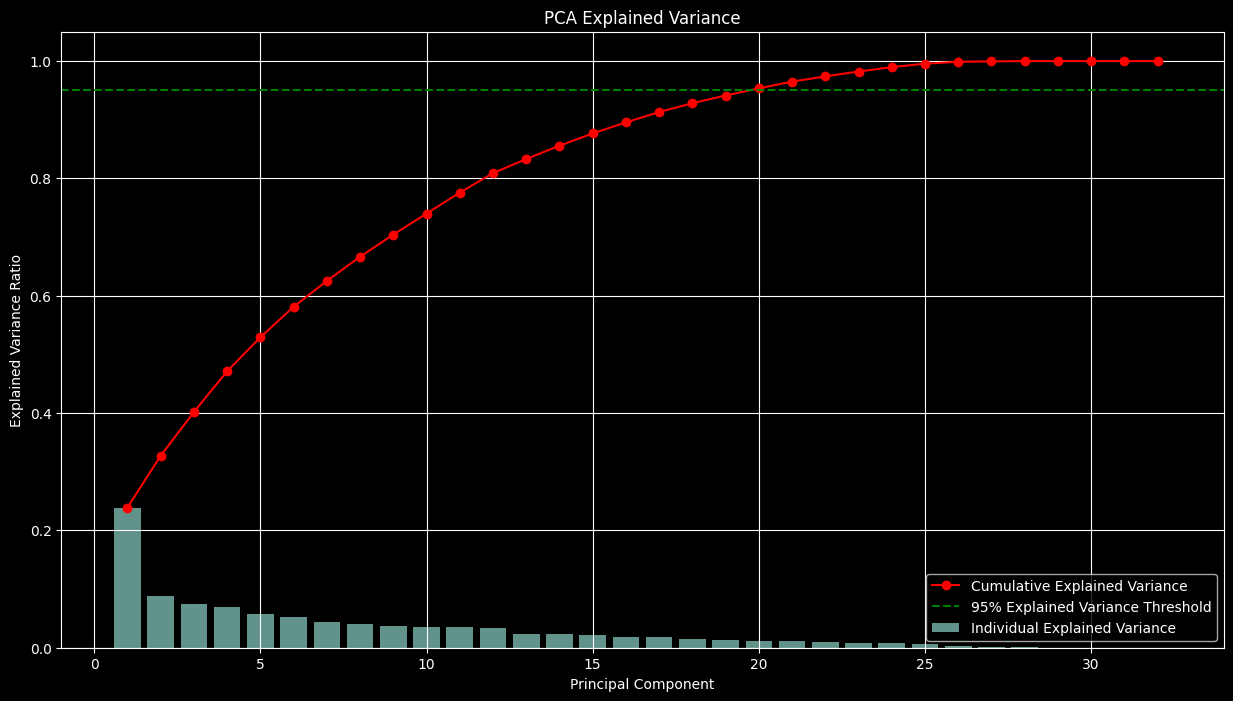

In [186]:
# Perform PCA and plot explained variance ratio
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(15, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Explained Variance Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
feature_names = df.drop('attack_cat', axis=1).columns.tolist()
print(feature_names)

['dur', 'proto', 'spkts', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'djit', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'is_ftp_login', 'ct_flw_http_mthd', 'state_CON', 'state_ECO', 'state_INT', 'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no']


In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
import numpy as np
import random

# Genetic Algorithm parameters
population_size = 20
generations = 10
mutation_rate = 0.1
n_features = X.shape[1]

def fitness(individual, X, y):
    # Use only selected features
    selected = np.where(individual == 1)[0]
    if len(selected) == 0:
        return 0
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X[:, selected], y, cv=3, scoring='accuracy')
    return scores.mean()

# Initialize population
population = np.random.randint(2, size=(population_size, n_features))

for gen in range(generations):
    fitness_scores = np.array([fitness(ind, X, y) for ind in population])
    # Selection (tournament)
    selected_indices = np.argsort(fitness_scores)[-population_size//2:]
    selected_population = population[selected_indices]
    # Crossover
    offspring = []
    while len(offspring) < population_size:
        parents = selected_population[np.random.choice(selected_population.shape[0], 2, replace=False)]
        crossover_point = np.random.randint(1, n_features-1)
        child = np.concatenate([parents[0][:crossover_point], parents[1][crossover_point:]])
        # Mutation
        for i in range(n_features):
            if random.random() < mutation_rate:
                child[i] = 1 - child[i]
        offspring.append(child)
    population = np.array(offspring)

# Get the best individual
fitness_scores = np.array([fitness(ind, X, y) for ind in population])
best_individual = population[np.argmax(fitness_scores)]
selected_features = np.where(best_individual == 1)[0]
print("Selected feature indices:", selected_features)
print("Selected feature names:", [feature_names[i] for i in selected_features])

Selected feature indices: [ 0  1  2  3  5  6  8  9 12 13 14 16 18 19 20 21 22 23 24 27 28 29 30]


IndexError: list index out of range

In [203]:
selected_features

array([ 0,  1,  2,  3,  5,  6,  8,  9, 12, 13, 14, 16, 18, 19, 20, 21, 22,
       23, 24, 27, 28, 29])

In [205]:
selected_features = selected_features[:-1]
print(selected_features)

[ 0  1  2  3  5  6  8  9 12 13 14 16 18 19 20 21 22 23 24 27 28]


In [206]:
# Create a list of feature names corresponding to selected_features indices
feature_names = [feature_names[i] for i in selected_features]

# Update the dataframe to keep only the selected features and the target column
df = df[feature_names + ['attack_cat']]
df.head()

,dur,proto,spkts,dpkts,sttl,dttl,dload,sinpkt,dtcpb,smean,...,ct_state_ttl,is_ftp_login,ct_flw_http_mthd,state_CON,state_ECO,state_INT,state_PAR,state_URN,state_no,attack_cat
0,0.000008,0.068917,2,0,254,0,0.0,0.008,0,100,...,2,0,0,0,0,1,0,0,0,0
1,0.000008,0.068917,2,0,254,0,0.0,0.008,0,100,...,2,0,0,0,0,1,0,0,0,0
2,0.000007,0.068917,2,0,254,0,0.0,0.007,0,100,...,2,0,0,0,0,1,0,0,0,0
3,0.000008,0.068917,2,0,254,0,0.0,0.008,0,100,...,2,0,0,0,0,1,0,0,0,0
4,0.000006,0.068917,2,0,254,0,0.0,0.006,0,100,...,2,0,0,0,0,1,0,0,0,0


In [207]:
df

,dur,proto,spkts,dpkts,sttl,dttl,dload,sinpkt,dtcpb,smean,...,ct_state_ttl,is_ftp_login,ct_flw_http_mthd,state_CON,state_ECO,state_INT,state_PAR,state_URN,state_no,attack_cat
0,0.000008,0.068917,2,0,254,0,0.000000,0.008000,0,100,...,2,0,0,0,0,1,0,0,0,0
1,0.000008,0.068917,2,0,254,0,0.000000,0.008000,0,100,...,2,0,0,0,0,1,0,0,0,0
2,0.000007,0.068917,2,0,254,0,0.000000,0.007000,0,100,...,2,0,0,0,0,1,0,0,0,0
3,0.000008,0.068917,2,0,254,0,0.000000,0.008000,0,100,...,2,0,0,0,0,1,0,0,0,0
4,0.000006,0.068917,2,0,254,0,0.000000,0.006000,0,100,...,2,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241891,0.442261,0.455946,10,6,254,252,4539.869778,48.668140,3825075048,108,...,1,0,1,0,0,0,0,0,0,9
241892,0.568221,0.455946,10,6,254,252,3659.410143,60.942466,131784913,130,...,1,0,1,0,0,0,0,0,0,9
241893,0.413041,0.455946,10,6,254,252,6203.526434,45.557604,3514813270,131,...,1,0,1,0,0,0,0,0,0,9
241894,3.035414,0.455946,40,213,254,252,753952.333698,75.473021,565586840,51,...,1,0,0,0,0,0,0,0,0,9


In [208]:
feature_names

['dur',
 'proto',
 'spkts',
 'dpkts',
 'sttl',
 'dttl',
 'dload',
 'sinpkt',
 'dtcpb',
 'smean',
 'dmean',
 'response_body_len',
 'ct_state_ttl',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'state_CON',
 'state_ECO',
 'state_INT',
 'state_PAR',
 'state_URN',
 'state_no']

In [209]:
X = df.drop(columns='attack_cat')
y = df['attack_cat']

In [210]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# Full model
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_pred_before = model.predict(X_test)
log_accuracy_before = accuracy_score(y_test, logistic_pred_before)
print(f"Full model accuracy: {log_accuracy_before:.4f}")

Full model accuracy: 0.8276


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [212]:
# Full model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
tree_pred_before = model.predict(X_test)
tree_accuracy_before = accuracy_score(y_test, tree_pred_before)
print(f"Full model accuracy: {tree_accuracy_before:.4f}")

Full model accuracy: 0.9538


In [213]:
# Full model
model = RandomForestClassifier()
model.fit(X_train, y_train)
forest_pred_before = model.predict(X_test)
forest_accuracy_before = accuracy_score(y_test, forest_pred_before)
print(f"Full model accuracy: {forest_accuracy_before:.4f}")

Full model accuracy: 0.9621


In [214]:
# Full model
model = KNeighborsClassifier()
model.fit(X_train, y_train)
knn_pred_before = model.predict(X_test)
knn_accuracy_before = accuracy_score(y_test, knn_pred_before)
print(f"Full model accuracy: {knn_accuracy_before:.4f}")

Full model accuracy: 0.9365


In [215]:
# Full model
model = XGBClassifier()
model.fit(X_train, y_train)
xg_pred_before = model.predict(X_test)
xg_accuracy_before = accuracy_score(y_test, xg_pred_before)
print(f"Full model accuracy: {xg_accuracy_before:.4f}")

Full model accuracy: 0.9549


In [216]:
# Full model
model = LGBMClassifier()
model.fit(X_train, y_train)
lg_pred_before = model.predict(X_test)
lg_accuracy_before = accuracy_score(y_test, lg_pred_before)
print(f"Full model accuracy: {lg_accuracy_before:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 193516, number of used features: 17
[LightGBM] [Info] Start training from score -2.765647
[LightGBM] [Info] Start training from score -3.272158
[LightGBM] [Info] Start training from score -4.429846
[LightGBM] [Info] Start training from score -3.422274
[LightGBM] [Info] Start training from score -2.583722
[LightGBM] [Info] Start training from score -1.484289
[LightGBM] [Info] Start training from score -1.882700
[LightGBM] [Info] Start training from score -2.256120
[LightGBM] [Info] Start training from score -1.994613
[LightGBM] [Info] Start training from score -1.836159


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Full model accuracy: 0.9560


In [217]:
# Full model
model = BaggingClassifier()
model.fit(X_train, y_train)
bg_pred_before = model.predict(X_test)
bg_accuracy_before = accuracy_score(y_test, bg_pred_before)
print(f"Full model accuracy: {bg_accuracy_before:.4f}")

Full model accuracy: 0.9593


In [218]:
parameters = {
    'max_iter': [1000],  # Ensure convergence
}

clf = LogisticRegression()
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_iter': 1000}


In [219]:
best_model = grid.best_estimator_
log_pred_after = best_model.predict(X_test)

In [220]:
log_accuracy_after = accuracy_score(y_test, log_pred_after)
print(f"Logistic Accuracy After Tuning: {log_accuracy_after:.4f}")

Logistic Accuracy After Tuning: 0.8239


In [231]:
parameters = {
    'criterion': ['gini'],         # use only 'gini' to reduce search space
    'max_depth': [25],         # smaller set of depths
    'min_samples_split': [5],   # reasonable defaults
    'min_samples_leaf': [5]     # fewer options
}

# Initialize model and GridSearchCV without StratifiedKFold (uses default 5-fold)
clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [232]:
best_model = grid.best_estimator_
tree_pred_after = best_model.predict(X_test)

In [233]:
tree_accuracy_after = accuracy_score(y_test, tree_pred_after)
print(f"Decision Tree Accuracy After Tuning: {tree_accuracy_after:.4f}")

Decision Tree Accuracy After Tuning: 0.9492


In [225]:
parameters = {
    'n_estimators': [100],           # default reasonable size
    'max_depth': [None],             # no depth limit
    'min_samples_split': [2],        # default
    'min_samples_leaf': [1],         # default
    'max_features': ['sqrt'],        # default for classification
    'bootstrap': [True]              # faster and standard
}

# Use default cross-validation (5-fold)
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [226]:
best_model = grid.best_estimator_
forest_pred_after = best_model.predict(X_test)

In [ ]:
forest_accuracy_after = accuracy_score(y_test, forest_pred_after)
print(f"Random FOrest Accuracy After Tuning: {forest_accuracy_after:.4f}")

Decision Tree Accuracy After Tuning: 0.9620


In [237]:
parameters = {
    'n_neighbors': [5],             # Standard choice, good for most cases
    'weights': ['distance'],        # Better when data is scaled
    'p': [2],                       # Euclidean distance
    'algorithm': ['auto'],          # Let scikit-learn choose the best
    'leaf_size': [40]               # Default value
}

# Use default cross-validation (5-fold)
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [238]:
best_model = grid.best_estimator_
knn_pred_after = best_model.predict(X_test)

In [239]:
knn_accuracy_after = accuracy_score(y_test, knn_pred_after)
print(f"KNN Accuracy After Tuning: {knn_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.9460


In [240]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1]
}

# Use default cross-validation (5-fold)
clf = XGBClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:38:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [241]:
best_model = grid.best_estimator_
xg_pred_after = best_model.predict(X_test)

In [242]:
xg_accuracy_after = accuracy_score(y_test, xg_pred_after)
print(f"KNN Accuracy After Tuning: {xg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.9593


In [243]:
parameters = {
    'n_estimators': [500],
    'max_depth': [None],
    'learning_rate': [0.1],
    'subsample': [0.8],           # same as bagging_fraction in LGBM
    'colsample_bytree': [0.8],   # same as feature_fraction in LGBM
    'min_child_samples': [20],   # controls overfitting
    'reg_alpha': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1],
}
clf = LGBMClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2878
[LightGBM] [Info] Number of data points in the train set: 193516, number of used features: 17
[LightGBM] [Info] Start training from score -2.765647
[LightGBM] [Info] Start training from score -3.272158
[LightGBM] [Info] Start training from score -4.429846
[LightGBM] [Info] Start training from score -3.422274
[LightGBM] [Info] Start training from score -2.583722
[LightGBM] [Info] Start training from score -1.484289
[LightGBM] [Info] Start training from score -1.882700
[LightGBM] [Info] Start training from score -2.256120
[LightGBM] [Info] Start training from score -1.994613
[LightGBM] [Info] Start training from score -1.836159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [245]:
best_model = grid.best_estimator_
lg_pred_after = best_model.predict(X_test)

c:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [246]:
lg_accuracy_after = accuracy_score(y_test, lg_pred_after)
print(f"KNN Accuracy After Tuning: {lg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.9636


In [247]:
parameters = {
    'n_estimators': [100],        # number of base estimators
    'max_samples': [0.8],         # fraction of dataset for each base learner
    'max_features': [0.8],        # fraction of features per learner
    'bootstrap': [True],          # with replacement
    'bootstrap_features': [False], # no resampling of features
    'random_state': [42]          # reproducibility
}
clf = BaggingClassifier()
grid = GridSearchCV(clf, parameters, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100, 'random_state': 42}


In [248]:
best_model = grid.best_estimator_
bg_pred_after = best_model.predict(X_test)

In [249]:
bg_accuracy_after = accuracy_score(y_test, bg_pred_after)
print(f"KNN Accuracy After Tuning: {bg_accuracy_after:.4f}")

KNN Accuracy After Tuning: 0.9624


In [250]:
print("Classification Report:\n", classification_report(y_test, logistic_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.96      0.77      2962
           1       0.67      0.29      0.41      1732
           2       0.79      0.12      0.22       553
           3       0.79      0.56      0.65      1630
           4       0.76      0.51      0.61      3642
           5       0.90      1.00      0.95     10905
           6       0.99      0.96      0.98      7349
           7       0.77      0.78      0.77      5052
           8       0.67      0.81      0.73      6672
           9       0.92      0.84      0.88      7883

    accuracy                           0.83     48380
   macro avg       0.79      0.68      0.70     48380
weighted avg       0.83      0.83      0.82     48380



In [251]:
print("Classification Report:\n", classification_report(y_test, log_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76      2962
           1       0.67      0.28      0.40      1732
           2       0.87      0.13      0.23       553
           3       0.73      0.55      0.63      1630
           4       0.79      0.48      0.60      3642
           5       0.90      1.00      0.95     10905
           6       0.99      0.96      0.98      7349
           7       0.77      0.77      0.77      5052
           8       0.65      0.82      0.73      6672
           9       0.91      0.84      0.87      7883

    accuracy                           0.82     48380
   macro avg       0.79      0.68      0.69     48380
weighted avg       0.83      0.82      0.81     48380



In [252]:
print("Classification Report:\n", classification_report(y_test, tree_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2962
           1       0.82      0.84      0.83      1732
           2       0.64      0.63      0.64       553
           3       0.85      0.77      0.81      1630
           4       0.90      0.90      0.90      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.99      0.99      7349
           7       0.96      0.96      0.96      5052
           8       0.95      0.96      0.96      6672
           9       0.99      0.99      0.99      7883

    accuracy                           0.95     48380
   macro avg       0.90      0.89      0.89     48380
weighted avg       0.95      0.95      0.95     48380



In [253]:
print("Classification Report:\n", classification_report(y_test, tree_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2962
           1       0.82      0.81      0.81      1732
           2       0.61      0.58      0.59       553
           3       0.84      0.76      0.80      1630
           4       0.88      0.88      0.88      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.98      7349
           7       0.96      0.96      0.96      5052
           8       0.94      0.96      0.95      6672
           9       0.99      0.99      0.99      7883

    accuracy                           0.95     48380
   macro avg       0.89      0.88      0.88     48380
weighted avg       0.95      0.95      0.95     48380



In [254]:
print("Classification Report:\n", classification_report(y_test, forest_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2962
           1       0.84      0.85      0.85      1732
           2       0.79      0.64      0.71       553
           3       0.89      0.82      0.86      1630
           4       0.93      0.91      0.92      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.99      0.99      7349
           7       0.97      0.97      0.97      5052
           8       0.95      0.98      0.96      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.96     48380
   macro avg       0.92      0.90      0.91     48380
weighted avg       0.96      0.96      0.96     48380



In [255]:
print("Classification Report:\n", classification_report(y_test, forest_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      2962
           1       0.84      0.85      0.84      1732
           2       0.79      0.64      0.71       553
           3       0.89      0.82      0.86      1630
           4       0.93      0.91      0.92      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.99      0.99      7349
           7       0.97      0.97      0.97      5052
           8       0.95      0.98      0.97      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.96     48380
   macro avg       0.92      0.90      0.91     48380
weighted avg       0.96      0.96      0.96     48380



In [256]:
print("Classification Report:\n", classification_report(y_test, knn_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.82      2962
           1       0.72      0.74      0.73      1732
           2       0.73      0.40      0.52       553
           3       0.89      0.71      0.79      1630
           4       0.86      0.83      0.85      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.98      7349
           7       0.94      0.95      0.94      5052
           8       0.93      0.95      0.94      6672
           9       0.98      0.99      0.98      7883

    accuracy                           0.94     48380
   macro avg       0.88      0.84      0.85     48380
weighted avg       0.94      0.94      0.94     48380



In [257]:
print("Classification Report:\n", classification_report(y_test, knn_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      2962
           1       0.73      0.77      0.75      1732
           2       0.78      0.49      0.60       553
           3       0.91      0.74      0.82      1630
           4       0.89      0.86      0.88      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.99      0.99      7349
           7       0.96      0.96      0.96      5052
           8       0.94      0.97      0.95      6672
           9       0.98      0.99      0.99      7883

    accuracy                           0.95     48380
   macro avg       0.90      0.86      0.88     48380
weighted avg       0.95      0.95      0.95     48380



In [258]:
print("Classification Report:\n", classification_report(y_test, xg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      2962
           1       0.82      0.86      0.84      1732
           2       0.77      0.59      0.67       553
           3       0.89      0.79      0.83      1630
           4       0.91      0.87      0.89      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.99      7349
           7       0.97      0.96      0.96      5052
           8       0.92      0.98      0.95      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.95     48380
   macro avg       0.91      0.89      0.90     48380
weighted avg       0.95      0.95      0.95     48380



In [259]:
print("Classification Report:\n", classification_report(y_test, xg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2962
           1       0.83      0.86      0.85      1732
           2       0.78      0.62      0.69       553
           3       0.89      0.80      0.85      1630
           4       0.92      0.89      0.90      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.99      7349
           7       0.97      0.97      0.97      5052
           8       0.94      0.98      0.96      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.96     48380
   macro avg       0.92      0.90      0.91     48380
weighted avg       0.96      0.96      0.96     48380



In [260]:
print("Classification Report:\n", classification_report(y_test, lg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2962
           1       0.83      0.87      0.85      1732
           2       0.76      0.57      0.65       553
           3       0.88      0.79      0.84      1630
           4       0.91      0.88      0.89      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.99      7349
           7       0.97      0.96      0.96      5052
           8       0.92      0.98      0.95      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.96     48380
   macro avg       0.91      0.89      0.90     48380
weighted avg       0.96      0.96      0.96     48380



In [261]:
print("Classification Report:\n", classification_report(y_test, lg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2962
           1       0.84      0.87      0.85      1732
           2       0.78      0.64      0.70       553
           3       0.90      0.82      0.86      1630
           4       0.93      0.91      0.92      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.99      0.99      7349
           7       0.98      0.97      0.97      5052
           8       0.95      0.99      0.97      6672
           9       1.00      1.00      1.00      7883

    accuracy                           0.96     48380
   macro avg       0.92      0.91      0.91     48380
weighted avg       0.96      0.96      0.96     48380



In [262]:
print("Classification Report:\n", classification_report(y_test, bg_pred_before))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      2962
           1       0.84      0.84      0.84      1732
           2       0.71      0.64      0.67       553
           3       0.87      0.80      0.83      1630
           4       0.92      0.91      0.91      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.99      7349
           7       0.97      0.97      0.97      5052
           8       0.96      0.97      0.96      6672
           9       0.99      1.00      0.99      7883

    accuracy                           0.96     48380
   macro avg       0.91      0.90      0.90     48380
weighted avg       0.96      0.96      0.96     48380



In [263]:
print("Classification Report:\n", classification_report(y_test, bg_pred_after))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      2962
           1       0.84      0.85      0.85      1732
           2       0.85      0.54      0.66       553
           3       0.89      0.82      0.86      1630
           4       0.93      0.91      0.92      3642
           5       1.00      1.00      1.00     10905
           6       0.99      0.98      0.99      7349
           7       0.98      0.97      0.97      5052
           8       0.95      0.98      0.97      6672
           9       0.99      1.00      1.00      7883

    accuracy                           0.96     48380
   macro avg       0.93      0.90      0.91     48380
weighted avg       0.96      0.96      0.96     48380



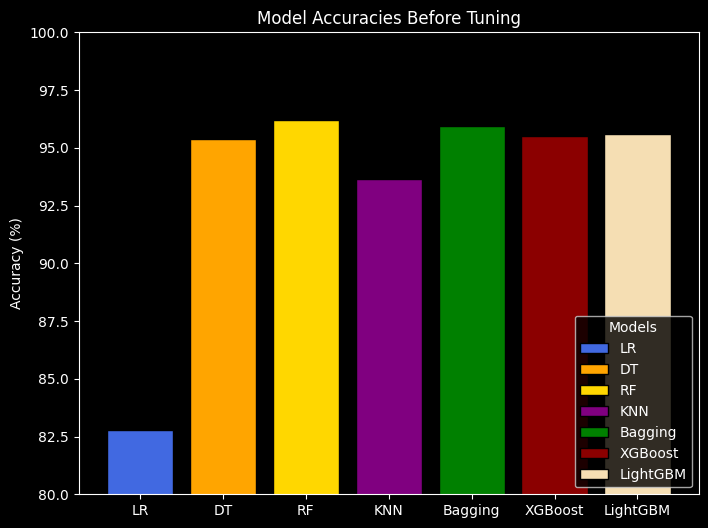

In [264]:
from matplotlib.patches import Patch

# Accuracies before tuning
accuracies = [
    log_accuracy_before,   # Logistic Regression
    tree_accuracy_before,  # Decision Tree
    forest_accuracy_before, # Random Forest
    knn_accuracy_before,   # KNN
    bg_accuracy_before,                  # AdaBoost (not computed)
    xg_accuracy_before,    # XGBoost
    lg_accuracy_before,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM',]
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(80, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies Before Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

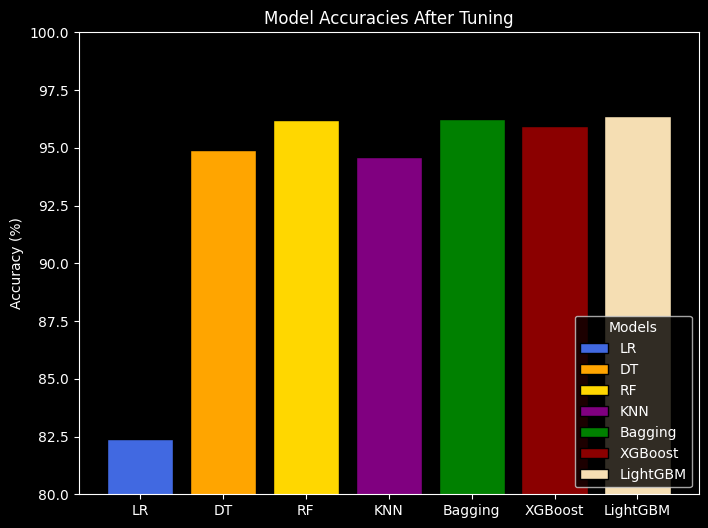

In [266]:
# Accuracies before tuning
accuracies = [
    log_accuracy_after,   # Logistic Regression
    tree_accuracy_after,  # Decision Tree
    forest_accuracy_after, # Random Forest
    knn_accuracy_after,   # KNN
    bg_accuracy_after,                  # AdaBoost (not computed)
    xg_accuracy_after,    # XGBoost
    lg_accuracy_after,    # LightGBM
]

# Model names and colors as in the image
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

# Remove None values for plotting (if AdaBoost/Proposed not available)
plot_names = [n for n, a in zip(model_names, accuracies) if a is not None]
plot_accs = [a*100 for a in accuracies if a is not None]
plot_colors = [c for c, a in zip(colors, accuracies) if a is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_accs, color=plot_colors, edgecolor='black')

plt.ylim(80, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies After Tuning')

# Custom legend
legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

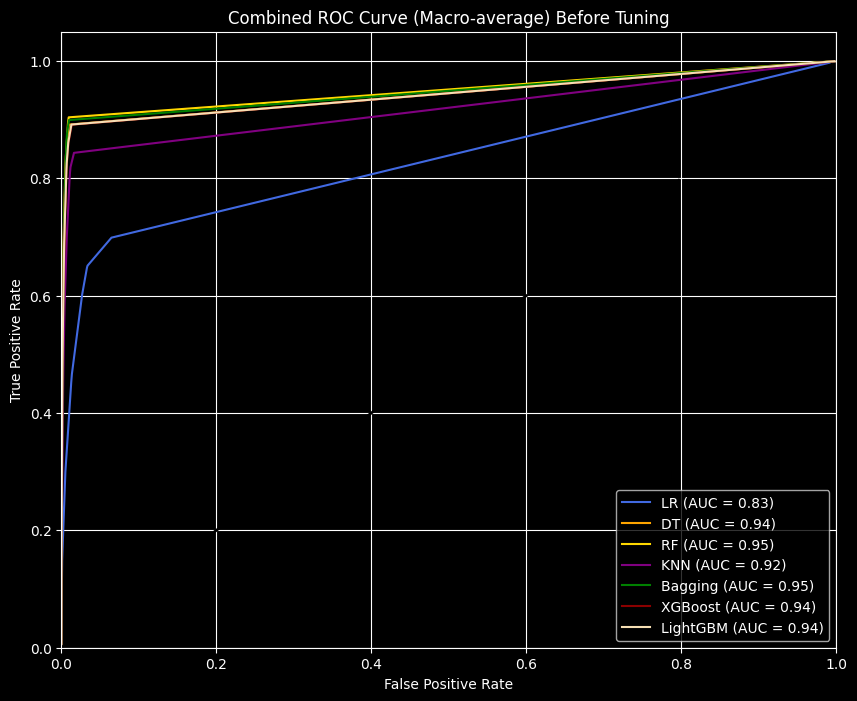

In [267]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    logistic_pred_before,  # Logistic Regression
    tree_pred_before,      # Decision Tree
    forest_pred_before,    # Random Forest
    knn_pred_before,       # KNN
    bg_pred_before,        # Bagging
    xg_pred_before,        # XGBoost
    lg_pred_before         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) Before Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

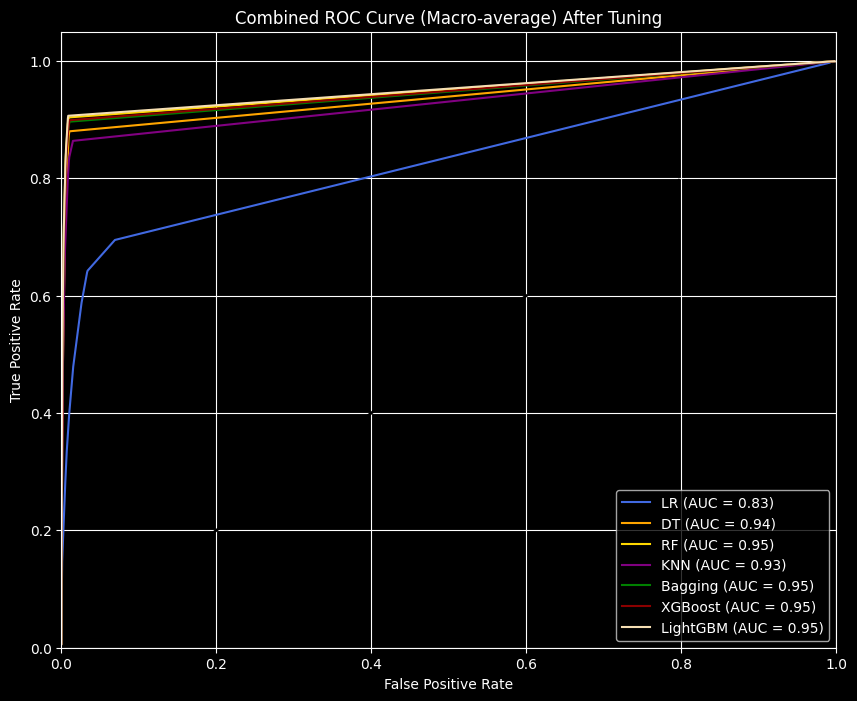

In [268]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Collect predictions for all models before tuning
model_preds = [
    log_pred_after,  # Logistic Regression
    tree_pred_after,      # Decision Tree
    forest_pred_after,    # Random Forest
    knn_pred_after,       # KNN
    bg_pred_after,        # Bagging
    xg_pred_after,        # XGBoost
    lg_pred_after         # LightGBM
]
model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = cycle(['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat'])

plt.figure(figsize=(10, 8))

for preds, name, color in zip(model_preds, model_names, colors):
    # Binarize predictions
    preds_bin = label_binarize(preds, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class, then average (macro)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], preds_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, color=color, label=f'{name} (AUC = {macro_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Macro-average) After Tuning')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

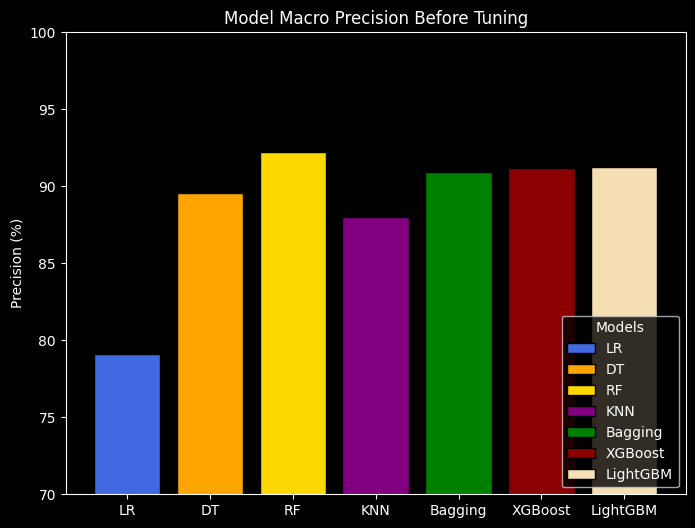

In [270]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model before tuning
precisions = [
    precision_score(y_test, logistic_pred_before, average='macro'),
    precision_score(y_test, tree_pred_before, average='macro'),
    precision_score(y_test, forest_pred_before, average='macro'),
    precision_score(y_test, knn_pred_before, average='macro'),
    precision_score(y_test, bg_pred_before, average='macro'),
    precision_score(y_test, xg_pred_before, average='macro'),
    precision_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions) if p is not None]
plot_precs = [p*100 for p in precisions if p is not None]
plot_colors = [c for c, p in zip(colors, precisions) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(70, 100)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

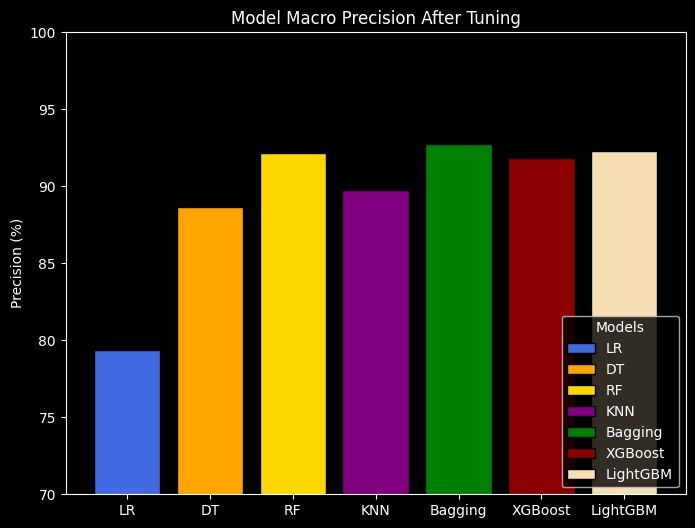

In [273]:
from sklearn.metrics import precision_score

# Calculate macro precision for each model after tuning
precisions_after = [
    precision_score(y_test, log_pred_after, average='macro'),
    precision_score(y_test, tree_pred_after, average='macro'),
    precision_score(y_test, forest_pred_after, average='macro'),
    precision_score(y_test, knn_pred_after, average='macro'),
    precision_score(y_test, bg_pred_after, average='macro'),
    precision_score(y_test, xg_pred_after, average='macro'),
    precision_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, p in zip(model_names, precisions_after) if p is not None]
plot_precs = [p*100 for p in precisions_after if p is not None]
plot_colors = [c for c, p in zip(colors, precisions_after) if p is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_precs, color=plot_colors, edgecolor='black')

plt.ylim(70, 100)
plt.ylabel('Precision (%)')
plt.title('Model Macro Precision After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

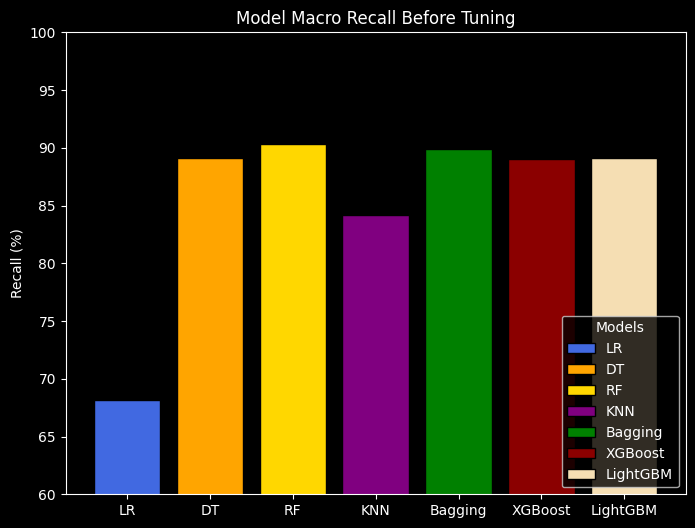

In [277]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model before tuning
recalls = [
    recall_score(y_test, logistic_pred_before, average='macro'),
    recall_score(y_test, tree_pred_before, average='macro'),
    recall_score(y_test, forest_pred_before, average='macro'),
    recall_score(y_test, knn_pred_before, average='macro'),
    recall_score(y_test, bg_pred_before, average='macro'),
    recall_score(y_test, xg_pred_before, average='macro'),
    recall_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls) if r is not None]
plot_recalls = [r*100 for r in recalls if r is not None]
plot_colors = [c for c, r in zip(colors, recalls) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(60, 100)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

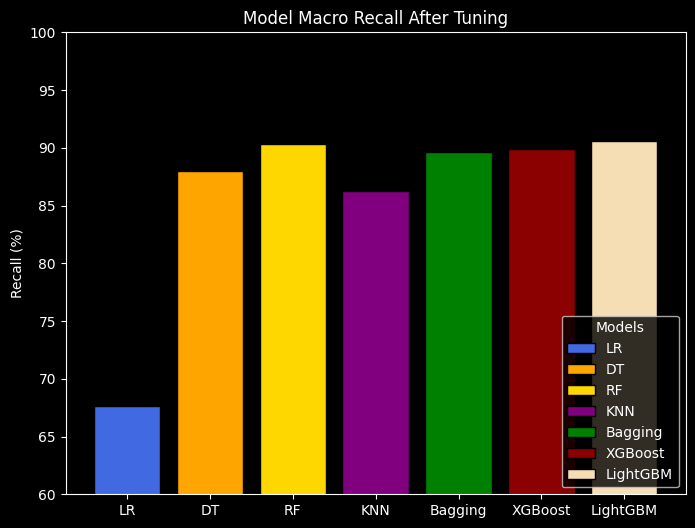

In [278]:
from sklearn.metrics import recall_score

# Calculate macro recall for each model after tuning
recalls_after = [
    recall_score(y_test, log_pred_after, average='macro'),
    recall_score(y_test, tree_pred_after, average='macro'),
    recall_score(y_test, forest_pred_after, average='macro'),
    recall_score(y_test, knn_pred_after, average='macro'),
    recall_score(y_test, bg_pred_after, average='macro'),
    recall_score(y_test, xg_pred_after, average='macro'),
    recall_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, r in zip(model_names, recalls_after) if r is not None]
plot_recalls = [r*100 for r in recalls_after if r is not None]
plot_colors = [c for c, r in zip(colors, recalls_after) if r is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_recalls, color=plot_colors, edgecolor='black')

plt.ylim(60, 100)
plt.ylabel('Recall (%)')
plt.title('Model Macro Recall After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

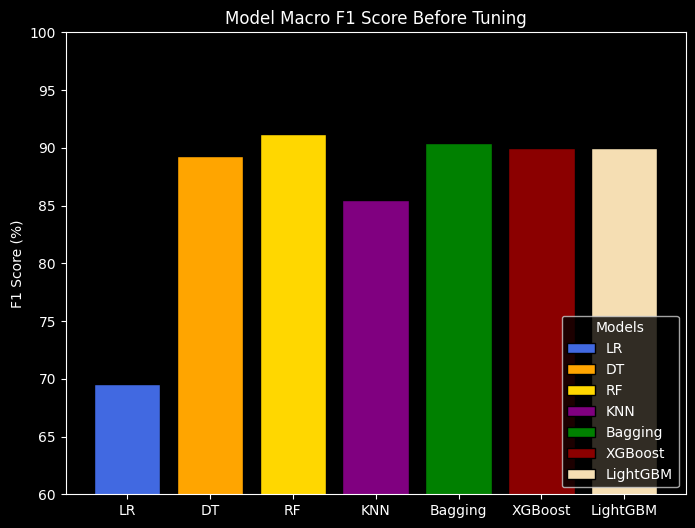

In [280]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, logistic_pred_before, average='macro'),
    f1_score(y_test, tree_pred_before, average='macro'),
    f1_score(y_test, forest_pred_before, average='macro'),
    f1_score(y_test, knn_pred_before, average='macro'),
    f1_score(y_test, bg_pred_before, average='macro'),
    f1_score(y_test, xg_pred_before, average='macro'),
    f1_score(y_test, lg_pred_before, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(60, 100)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score Before Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()

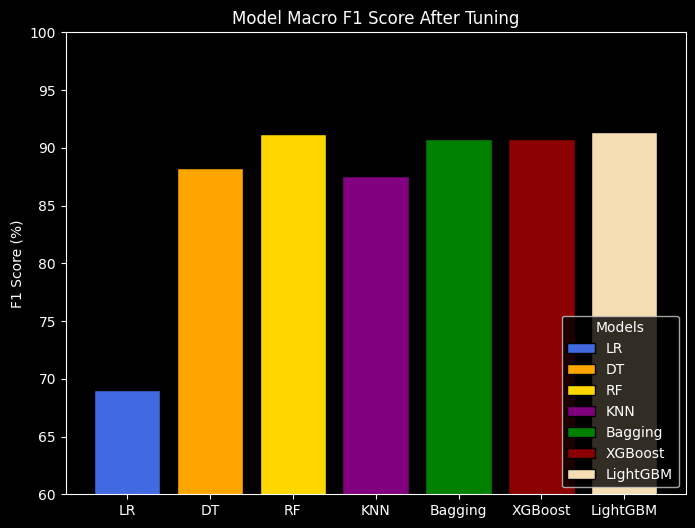

In [282]:
from sklearn.metrics import f1_score

# Calculate macro F1 for each model before tuning
f1s = [
    f1_score(y_test, log_pred_after, average='macro'),
    f1_score(y_test, tree_pred_after, average='macro'),
    f1_score(y_test, forest_pred_after, average='macro'),
    f1_score(y_test, knn_pred_after, average='macro'),
    f1_score(y_test, bg_pred_after, average='macro'),
    f1_score(y_test, xg_pred_after, average='macro'),
    f1_score(y_test, lg_pred_after, average='macro'),
]

model_names = ['LR', 'DT', 'RF', 'KNN', 'Bagging', 'XGBoost', 'LightGBM']
colors = ['royalblue', 'orange', 'gold', 'purple', 'green', 'darkred', 'wheat']

plot_names = [n for n, f in zip(model_names, f1s) if f is not None]
plot_f1s = [f*100 for f in f1s if f is not None]
plot_colors = [c for c, f in zip(colors, f1s) if f is not None]

plt.figure(figsize=(8, 6))
bars = plt.bar(plot_names, plot_f1s, color=plot_colors, edgecolor='black')

plt.ylim(60, 100)
plt.ylabel('F1 Score (%)')
plt.title('Model Macro F1 Score After Tuning')

legend_elements = [Patch(facecolor=c, edgecolor='black', label=n) for c, n in zip(plot_colors, plot_names)]
plt.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Models')

plt.show()